In [1]:
from interpolador_magnitudes import interpolar_espectro

Leyendo 13 archivos FITS...
se leyeron e interpolaron correctamente los espectros


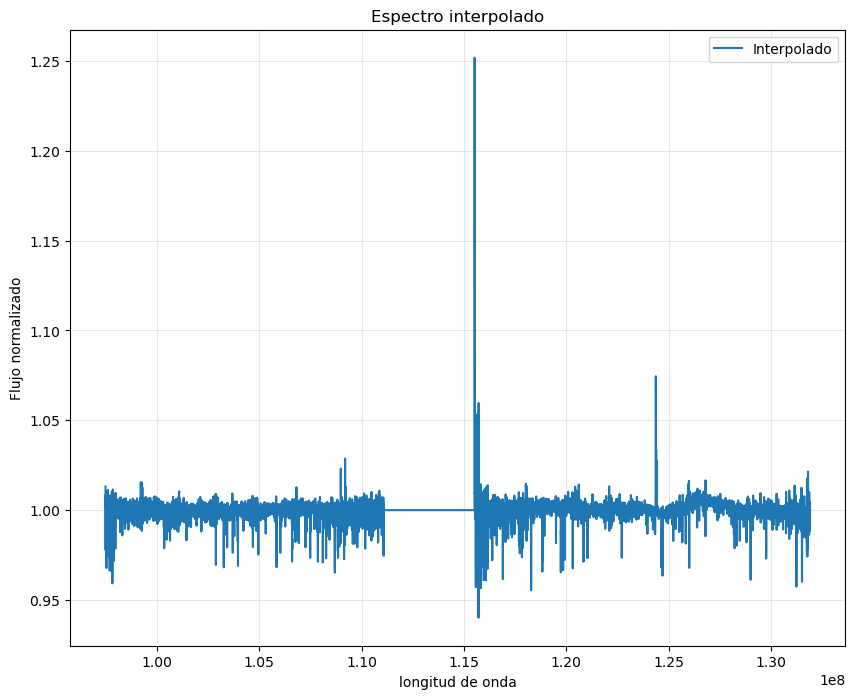

Archivo FITS guardado en /home/nacho/molecfit_test/mis_outputs_star1/star1interpolado.par_tac.fits


In [2]:
carpeta = "/home/nacho/molecfit_test/mis_outputs_star1/"
long,flux = interpolar_espectro(carpeta,"*AIR_modificado.par_tac_vcorr.fits",50000,plot=True)


Leyendo 13 archivos FITS...
se leyeron e interpolaron correctamente los espectros


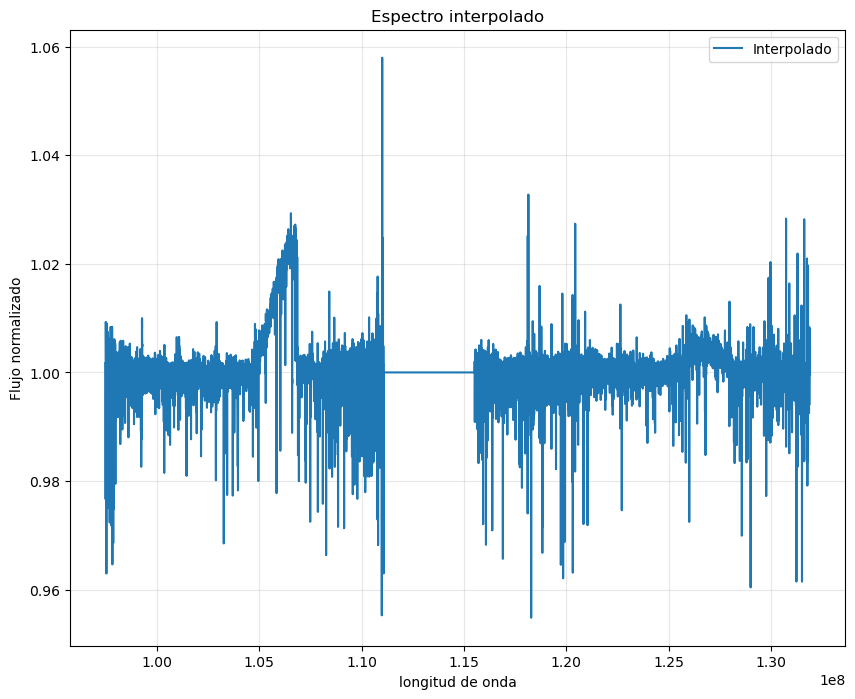

Archivo FITS guardado en /home/nacho/molecfit_test/mis_outputs_star3/star3interpolado.par_tac.fits


In [5]:
carpeta = "/home/nacho/molecfit_test/mis_outputs_star3/"
long,flux = interpolar_espectro(carpeta,"*AIR_modificado.par_tac_vcorr.fits")

Leyendo 13 archivos FITS...
se leyeron e interpolaron correctamente los espectros


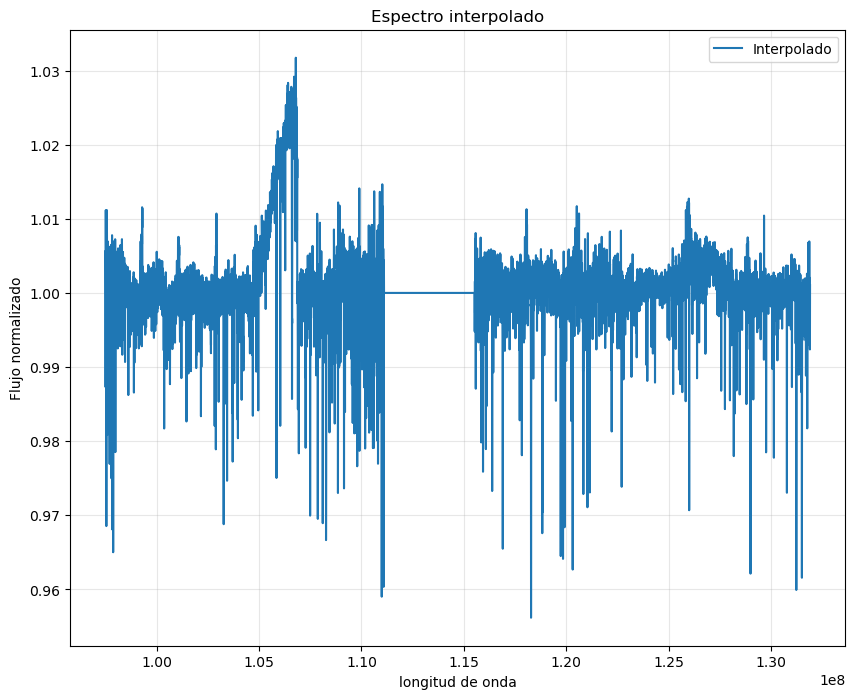

Archivo FITS guardado en /home/nacho/molecfit_test/mis_outputs_star4/star4interpolado.par_tac.fits


In [6]:
carpeta = "/home/nacho/molecfit_test/mis_outputs_star4/"
long,flux = interpolar_espectro(carpeta,"*AIR_modificado.par_tac_vcorr.fits")

Leyendo 13 archivos FITS...
se leyeron e interpolaron correctamente los espectros


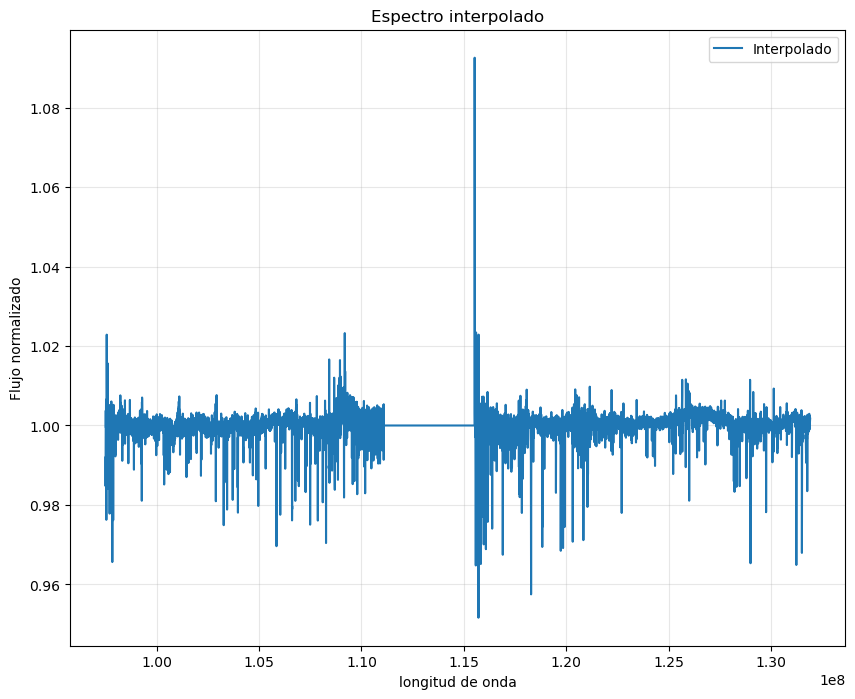

Archivo FITS guardado en /home/nacho/molecfit_test/mis_outputs_star7/star7interpolado.par_tac.fits


In [7]:
carpeta = "/home/nacho/molecfit_test/mis_outputs_star7/"
long,flux = interpolar_espectro(carpeta,"*AIR_modificado.par_tac_vcorr.fits")

Leyendo 13 archivos FITS...
se leyeron e interpolaron correctamente los espectros


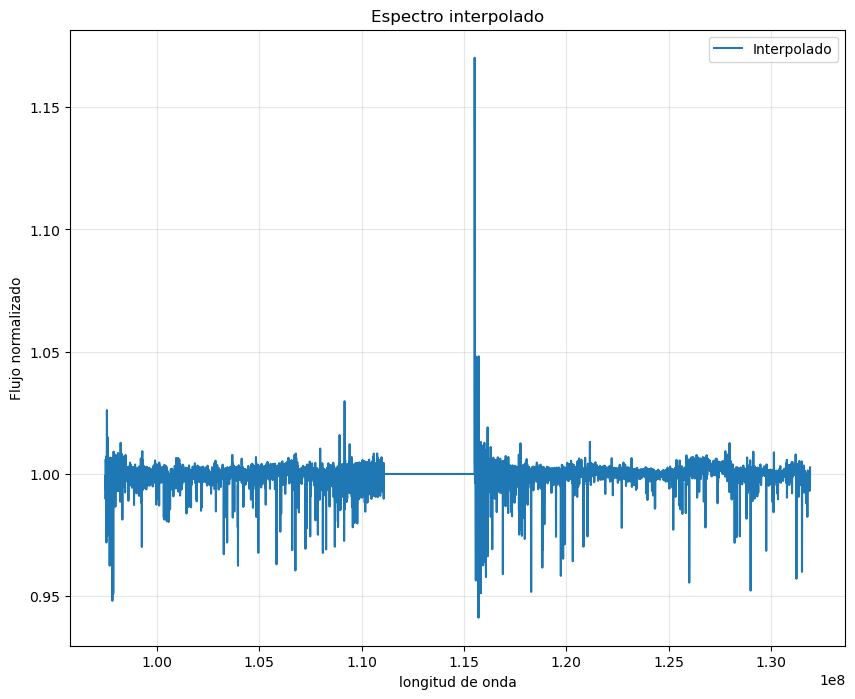

Archivo FITS guardado en /home/nacho/molecfit_test/mis_outputs_star8/star8interpolado.par_tac.fits


In [8]:
carpeta = "/home/nacho/molecfit_test/mis_outputs_star8/"
long,flux = interpolar_espectro(carpeta,"*AIR_modificado.par_tac_vcorr.fits")

Leyendo 13 archivos FITS...
se leyeron e interpolaron correctamente los espectros


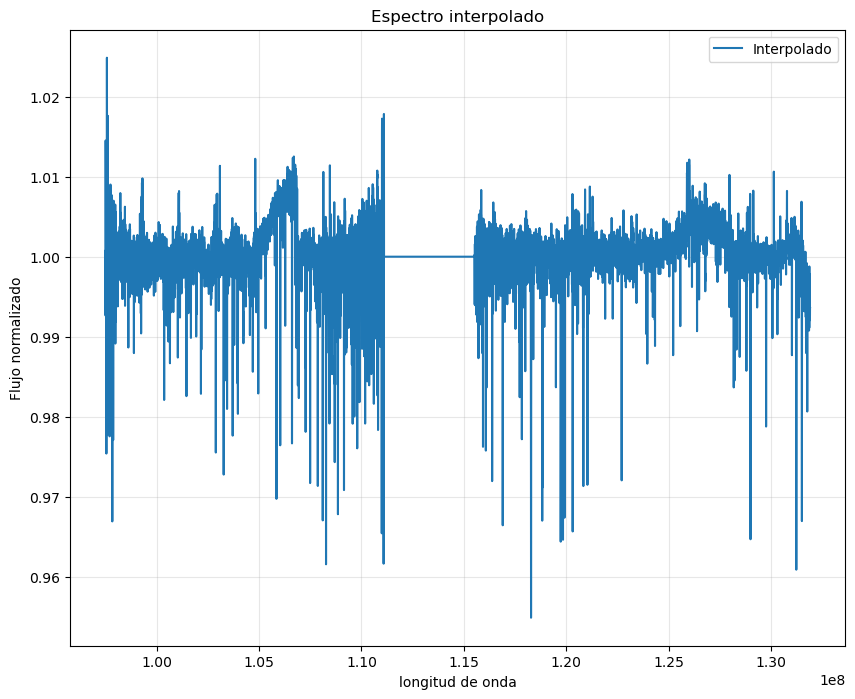

Archivo FITS guardado en /home/nacho/molecfit_test/mis_outputs_star9/star9interpolado.par_tac.fits


In [10]:
carpeta = "/home/nacho/molecfit_test/mis_outputs_star9/"
long,flux = interpolar_espectro(carpeta,"*AIR_modificado.par_tac_vcorr.fits")